In [1]:
import numpy as np
import pandas as pd
import networkx as nx
#borrowed heavily from the networkx library.

### Let's make a graph and get comfy with the framework.

{('A', 'B'): Text(0.07692307692307704, -0.3846153846153846, '4'),
 ('A', 'C'): Text(-0.7307692307692306, -0.2692307692307692, '2'),
 ('B', 'C'): Text(0.1923076923076924, -0.2692307692307692, '1'),
 ('B', 'D'): Text(0.5384615384615384, 0.07692307692307687, '5'),
 ('C', 'D'): Text(-0.2692307692307691, 0.19230769230769224, '8'),
 ('C', 'E'): Text(-0.15384615384615377, -0.03846153846153847, '10'),
 ('D', 'E'): Text(0.1923076923076923, 0.3076923076923076, '2'),
 ('D', 'F'): Text(0.07692307692307694, 0.42307692307692296, '8')}

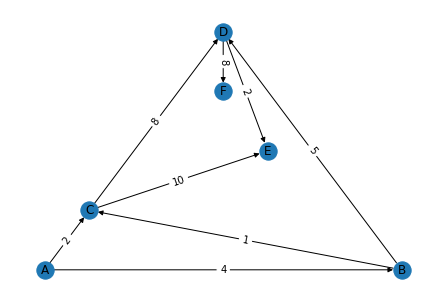

In [2]:
edges = [("A","B", {'weight':4}),
        ("A","C",{'weight':2}),
        ("B","C",{'weight':1}),
        ("B","D", {'weight':5}),
        ("C","D", {'weight':8}),
        ("C","E", {'weight':10}),
        ("D","E",{'weight':2}),
        ("D","F",{'weight':8})
        ]
edge_labels = {("A","B"):4, ("A","C"):2, ("B","C"):1, ("B","D"):5, ("C","D"):8, ("C","E"):10, ("D","E"):2, ("D","F"):8}
   
        
Graph1 = nx.DiGraph()
for i in range(1,7):
    Graph1.add_node(chr(ord('@')+i))
Graph1.add_edges_from(edges)

pos = nx.planar_layout(Graph1)
edge_labels = nx.get_edge_attributes(Graph1,'weight')
nx.draw(Graph1, with_labels = True, pos = pos)

nx.draw_networkx_edge_labels(Graph1,pos,edge_labels=edge_labels)


### Let's make it pretty

In [3]:
from pyvis import network as net 
g1=net.Network(notebook = True, directed=True)
g1.from_nx(Graph1)
g1.nodes[0]["color"] = "lightgreen"
g1.nodes[0]["title"] = "start"
g1.nodes[5]["color"] = "red"
g1.nodes[5]["title"] = "end"

g1.show("GraphSearch.html")


In [4]:
g1.edges 

##bonus thought: what if I wanted to display edges here? Start thinking!

[{'weight': 4, 'from': 'A', 'to': 'B', 'arrows': 'to'},
 {'weight': 2, 'from': 'A', 'to': 'C', 'arrows': 'to'},
 {'weight': 1, 'from': 'B', 'to': 'C', 'arrows': 'to'},
 {'weight': 5, 'from': 'B', 'to': 'D', 'arrows': 'to'},
 {'weight': 8, 'from': 'C', 'to': 'D', 'arrows': 'to'},
 {'weight': 10, 'from': 'C', 'to': 'E', 'arrows': 'to'},
 {'weight': 2, 'from': 'D', 'to': 'E', 'arrows': 'to'},
 {'weight': 8, 'from': 'D', 'to': 'F', 'arrows': 'to'}]

In [5]:
nx.shortest_path(Graph1, source="A", weight='weight')

{'A': ['A'],
 'B': ['A', 'B'],
 'C': ['A', 'C'],
 'D': ['A', 'B', 'D'],
 'E': ['A', 'B', 'D', 'E'],
 'F': ['A', 'B', 'D', 'F']}

## Let's do some Graph theory! Finally!

## BFS/DFS

In [6]:
print(list(nx.bfs_tree(Graph1, source="A"))) #this graph not very useful to illustrate BFS/DFS. 

['A', 'B', 'C', 'D', 'E', 'F']


In [7]:
#Lets make a better tree

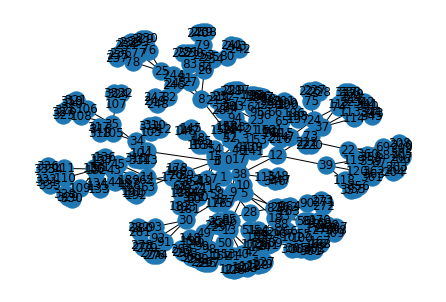

In [8]:
balanced_tree = nx.generators.balanced_tree(3, 5)
nx.draw(balanced_tree, with_labels = True)
G=net.Network(notebook = True)
G.from_nx(balanced_tree)

#Play around with an n-ary tree!

In [10]:
G.show("GraphSearch.html")

In [ ]:
#yikes! Not helpfu! 
# let's use this nifty solution here:
#
#https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3

In [ ]:
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

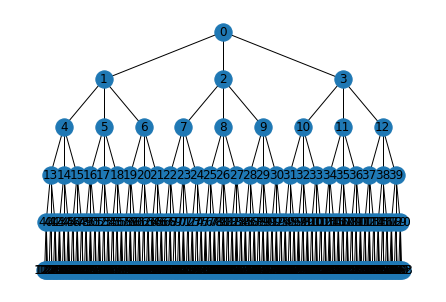

In [ ]:
pos = hierarchy_pos(balanced_tree,0)    
nx.draw(balanced_tree, pos=pos, with_labels=True)

## BFS & DFS Part Deux

In [ ]:
#Let's do the BFS nodes
print(list(nx.bfs_tree(balanced_tree, source=0)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
#Let's do the BFS edges
print(list(nx.bfs_tree(balanced_tree, source=0).edges()))

[(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (1, 6), (2, 7), (2, 8), (2, 9), (3, 10), (3, 11), (3, 12), (4, 13), (4, 14), (4, 15), (5, 16), (5, 17), (5, 18), (6, 19), (6, 20), (6, 21), (7, 22), (7, 23), (7, 24), (8, 25), (8, 26), (8, 27), (9, 28), (9, 29), (9, 30), (10, 31), (10, 32), (10, 33), (11, 34), (11, 35), (11, 36), (12, 37), (12, 38), (12, 39), (13, 40), (13, 41), (13, 42), (14, 43), (14, 44), (14, 45), (15, 46), (15, 47), (15, 48), (16, 49), (16, 50), (16, 51), (17, 52), (17, 53), (17, 54), (18, 55), (18, 56), (18, 57), (19, 58), (19, 59), (19, 60), (20, 61), (20, 62), (20, 63), (21, 64), (21, 65), (21, 66), (22, 67), (22, 68), (22, 69), (23, 70), (23, 71), (23, 72), (24, 73), (24, 74), (24, 75), (25, 76), (25, 77), (25, 78), (26, 79), (26, 80), (26, 81), (27, 82), (27, 83), (27, 84), (28, 85), (28, 86), (28, 87), (29, 88), (29, 89), (29, 90), (30, 91), (30, 92), (30, 93), (31, 94), (31, 95), (31, 96), (32, 97), (32, 98), (32, 99), (33, 100), (33, 101), (33, 102), (34, 103), (34,

In [ ]:
#Let's do the DFS nodes
print(list(nx.dfs_tree(balanced_tree, source=0)))

[0, 1, 4, 13, 40, 121, 122, 123, 41, 124, 125, 126, 42, 127, 128, 129, 14, 43, 130, 131, 132, 44, 133, 134, 135, 45, 136, 137, 138, 15, 46, 139, 140, 141, 47, 142, 143, 144, 48, 145, 146, 147, 5, 16, 49, 148, 149, 150, 50, 151, 152, 153, 51, 154, 155, 156, 17, 52, 157, 158, 159, 53, 160, 161, 162, 54, 163, 164, 165, 18, 55, 166, 167, 168, 56, 169, 170, 171, 57, 172, 173, 174, 6, 19, 58, 175, 176, 177, 59, 178, 179, 180, 60, 181, 182, 183, 20, 61, 184, 185, 186, 62, 187, 188, 189, 63, 190, 191, 192, 21, 64, 193, 194, 195, 65, 196, 197, 198, 66, 199, 200, 201, 2, 7, 22, 67, 202, 203, 204, 68, 205, 206, 207, 69, 208, 209, 210, 23, 70, 211, 212, 213, 71, 214, 215, 216, 72, 217, 218, 219, 24, 73, 220, 221, 222, 74, 223, 224, 225, 75, 226, 227, 228, 8, 25, 76, 229, 230, 231, 77, 232, 233, 234, 78, 235, 236, 237, 26, 79, 238, 239, 240, 80, 241, 242, 243, 81, 244, 245, 246, 27, 82, 247, 248, 249, 83, 250, 251, 252, 84, 253, 254, 255, 9, 28, 85, 256, 257, 258, 86, 259, 260, 261, 87, 262, 263, 2

In [ ]:
#Let's do the DFS edges
print(list(nx.dfs_edges(balanced_tree, source=0)))

[(0, 1), (1, 4), (4, 13), (13, 40), (40, 121), (40, 122), (40, 123), (13, 41), (41, 124), (41, 125), (41, 126), (13, 42), (42, 127), (42, 128), (42, 129), (4, 14), (14, 43), (43, 130), (43, 131), (43, 132), (14, 44), (44, 133), (44, 134), (44, 135), (14, 45), (45, 136), (45, 137), (45, 138), (4, 15), (15, 46), (46, 139), (46, 140), (46, 141), (15, 47), (47, 142), (47, 143), (47, 144), (15, 48), (48, 145), (48, 146), (48, 147), (1, 5), (5, 16), (16, 49), (49, 148), (49, 149), (49, 150), (16, 50), (50, 151), (50, 152), (50, 153), (16, 51), (51, 154), (51, 155), (51, 156), (5, 17), (17, 52), (52, 157), (52, 158), (52, 159), (17, 53), (53, 160), (53, 161), (53, 162), (17, 54), (54, 163), (54, 164), (54, 165), (5, 18), (18, 55), (55, 166), (55, 167), (55, 168), (18, 56), (56, 169), (56, 170), (56, 171), (18, 57), (57, 172), (57, 173), (57, 174), (1, 6), (6, 19), (19, 58), (58, 175), (58, 176), (58, 177), (19, 59), (59, 178), (59, 179), (59, 180), (19, 60), (60, 181), (60, 182), (60, 183), (

### Let's make a good graph for Djikstra & A*

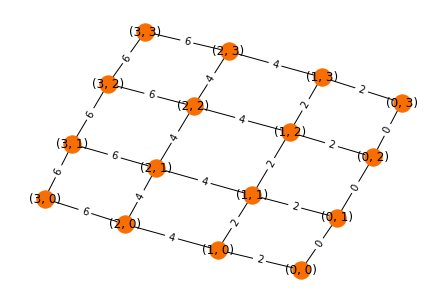

In [ ]:
import matplotlib.pyplot as plt 
DA = nx.grid_graph(dim=[4, 4])  # nodes are two-tuples (x,y)
nx.set_edge_attributes(DA, {e: e[1][0] * 2 for e in DA.edges()}, "cost")
pos = nx.spring_layout(DA)
nx.draw(DA, pos, with_labels = True, node_color="#f86e00")
edge_labels = nx.get_edge_attributes(DA, "cost")
nx.draw_networkx_edge_labels(DA, pos, edge_labels=edge_labels)
plt.show()

##Ignore the weights for now!

In [ ]:
for idx, e in enumerate(G.edges()):
    print("idx: " + str(idx) + "- edge: " + str(e))
G.number_of_edges() #Do the SMART thing. DO things the EASY way. 

TypeError: 'list' object is not callable

In [ ]:
print(list(nx.bfs_tree(DA, source=(0,0)))) ## BFS

[(0, 0), (1, 0), (0, 1), (2, 0), (1, 1), (0, 2), (3, 0), (2, 1), (1, 2), (0, 3), (3, 1), (2, 2), (1, 3), (3, 2), (2, 3), (3, 3)]


In [ ]:
print(list(nx.dfs_tree(DA, source=(0,0)))) ##DFS

[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (2, 1), (1, 1), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (2, 3), (1, 3), (0, 3)]


## Djikstra's (greedy? (kinda). UCS (kinda). Awesome? Yes!)

In [ ]:
p1 = nx.shortest_path(DA, source=(0,0), weight='weight')
p1

{(0, 0): [(0, 0)],
 (1, 0): [(0, 0), (1, 0)],
 (0, 1): [(0, 0), (0, 1)],
 (2, 0): [(0, 0), (1, 0), (2, 0)],
 (1, 1): [(0, 0), (1, 0), (1, 1)],
 (0, 2): [(0, 0), (0, 1), (0, 2)],
 (3, 0): [(0, 0), (1, 0), (2, 0), (3, 0)],
 (2, 1): [(0, 0), (1, 0), (2, 0), (2, 1)],
 (1, 2): [(0, 0), (1, 0), (1, 1), (1, 2)],
 (0, 3): [(0, 0), (0, 1), (0, 2), (0, 3)],
 (3, 1): [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1)],
 (2, 2): [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)],
 (1, 3): [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3)],
 (3, 2): [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2)],
 (2, 3): [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3)],
 (3, 3): [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)]}

### A*


In [ ]:
import networkx as nx

def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

path = nx.astar_path(DA, (0, 0), (3, 3), heuristic=dist, weight="cost")
length = nx.astar_path_length(DA, (0, 0), (3, 3), heuristic=dist, weight="cost")
print("Path: " + str(path))
print("Path length: " + str(length))


Path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
Path length: 12
